In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
df=pd.read_csv('resume_quality_dataset_5500.csv')
df

,resume_text,quality
0,"Graduate with knowledge of Java, JavaScript, C...",1
1,Fresher with no significant technical experience.,0
2,"Graduate with knowledge of C, Excel, Communica...",1
3,Basic computer knowledge with no significant t...,0
4,Experienced professional with skills in Python...,2
...,...,...
5495,Basic computer knowledge with no significant t...,0
5496,"Graduate with knowledge of HTML, Java, C, C++ ...",1
5497,Experienced professional with skills in Docker...,2
5498,Experienced professional with skills in Python...,2


In [3]:
df.head()

,resume_text,quality
0,"Graduate with knowledge of Java, JavaScript, C...",1
1,Fresher with no significant technical experience.,0
2,"Graduate with knowledge of C, Excel, Communica...",1
3,Basic computer knowledge with no significant t...,0
4,Experienced professional with skills in Python...,2


In [23]:
df.tail()

,resume_text,quality
5495,Basic computer knowledge with no significant t...,0
5496,"Graduate with knowledge of HTML, Java, C, C++ ...",1
5497,Experienced professional with skills in Docker...,2
5498,Experienced professional with skills in Python...,2
5499,Experienced professional with skills in Deep L...,2


In [25]:
df.shape

(5500, 2)

In [26]:
df.dtypes

resume_text    object
quality         int64
dtype: object

In [27]:
df.isna().sum()

resume_text    0
quality        0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

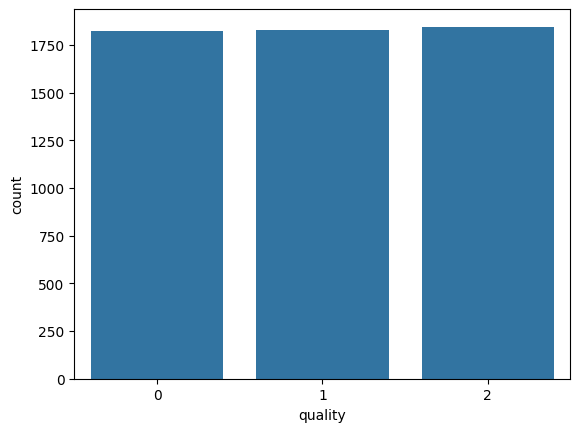

In [4]:
sns.countplot(x=df['quality'])

In [5]:
df1=df['quality'].value_counts()
df1

quality
2    1846
1    1829
0    1825
Name: count, dtype: int64

In [6]:
tweets=df['resume_text']
tweets

0       Graduate with knowledge of Java, JavaScript, C...
1       Fresher with no significant technical experience.
2       Graduate with knowledge of C, Excel, Communica...
3       Basic computer knowledge with no significant t...
4       Experienced professional with skills in Python...
                              ...                        
5495    Basic computer knowledge with no significant t...
5496    Graduate with knowledge of HTML, Java, C, C++ ...
5497    Experienced professional with skills in Docker...
5498    Experienced professional with skills in Python...
5499    Experienced professional with skills in Deep L...
Name: resume_text, Length: 5500, dtype: object

In [7]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\basil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
from nltk.tokenize import TweetTokenizer
data=TweetTokenizer()
tweets=tweets.apply(lambda x:data.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       Graduate with knowledge of Java , JavaScript ,...
1       Fresher with no significant technical experien...
2       Graduate with knowledge of C , Excel , Communi...
3       Basic computer knowledge with no significant t...
4       Experienced professional with skills in Python...
                              ...                        
5495    Basic computer knowledge with no significant t...
5496    Graduate with knowledge of HTML , Java , C , C...
5497    Experienced professional with skills in Docker...
5498    Experienced professional with skills in Python...
5499    Experienced professional with skills in Deep L...
Name: resume_text, Length: 5500, dtype: object

In [9]:
#remove special characters
tweets=tweets.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0       Graduate with knowledge of Java   JavaScript  ...
1       Fresher with no significant technical experien...
2       Graduate with knowledge of C   Excel   Communi...
3       Basic computer knowledge with no significant t...
4       Experienced professional with skills in Python...
                              ...                        
5495    Basic computer knowledge with no significant t...
5496    Graduate with knowledge of HTML   Java   C   C...
5497    Experienced professional with skills in Docker...
5498    Experienced professional with skills in Python...
5499    Experienced professional with skills in Deep L...
Name: resume_text, Length: 5500, dtype: object

In [10]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower())for i in data.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       graduat with knowledg of java javascript css b...
1                 fresher with no signific technic experi
2       graduat with knowledg of c excel communic html...
3       basic comput knowledg with no signific technic...
4       experienc profession with skill in python pyto...
                              ...                        
5495    basic comput knowledg with no signific technic...
5496    graduat with knowledg of html java c c seek en...
5497    experienc profession with skill in docker tens...
5498    experienc profession with skill in python deep...
5499    experienc profession with skill in deep learn ...
Name: resume_text, Length: 5500, dtype: object

In [11]:
nltk.download('stopwords')  #we have to download resource package for nltk
from nltk.corpus import stopwords
word=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\basil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if w not in word]))
tweets

0       graduat knowledg java javascript css basic pyt...
1                         fresher signific technic experi
2       graduat knowledg c excel communic html seek en...
3           basic comput knowledg signific technic experi
4       experienc profession skill python pytorch dock...
                              ...                        
5495        basic comput knowledg signific technic experi
5496    graduat knowledg html java c c seek entri leve...
5497    experienc profession skill docker tensorflow s...
5498    experienc profession skill python deep learn t...
5499    experienc profession skill deep learn pytorch ...
Name: resume_text, Length: 5500, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 48121 stored elements and shape (5500, 39)>

In [14]:
data.shape

(5500, 39)

In [15]:
x=data

In [16]:
y=df['quality'].values
y

array([1, 0, 1, ..., 2, 2, 2], shape=(5500,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [20]:
import pickle

pickle.dump(model, open("resume_model.pkl", "wb"))
pickle.dump(vec, open("tfidf_vectorizer.pkl", "wb"))


In [21]:
import pdfplumber

def pdf_to_text(path):
    text = ""
    with pdfplumber.open(path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text


In [22]:
model = pickle.load(open("resume_model.pkl", "rb"))
vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

resume_text = pdf_to_text("sample_resume.pdf")
X_new = vectorizer.transform([resume_text])

prediction = model.predict(X_new)
print("Predicted Resume Quality:", prediction[0])


Predicted Resume Quality: 2
